## Multi-Linear Regression
- Intrest Rate:- it is calculated based on unemployment_rate and index_price
- dependent featue is "intreset reate" and independent is unemployement and index price

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# now dorp unnecessary columns:- Unnamed: 0, year, month because we don't need these
df_index.drop(columns = ["Unnamed: 0","year","month"], axis = 1, inplace = True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
# check any missing value
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

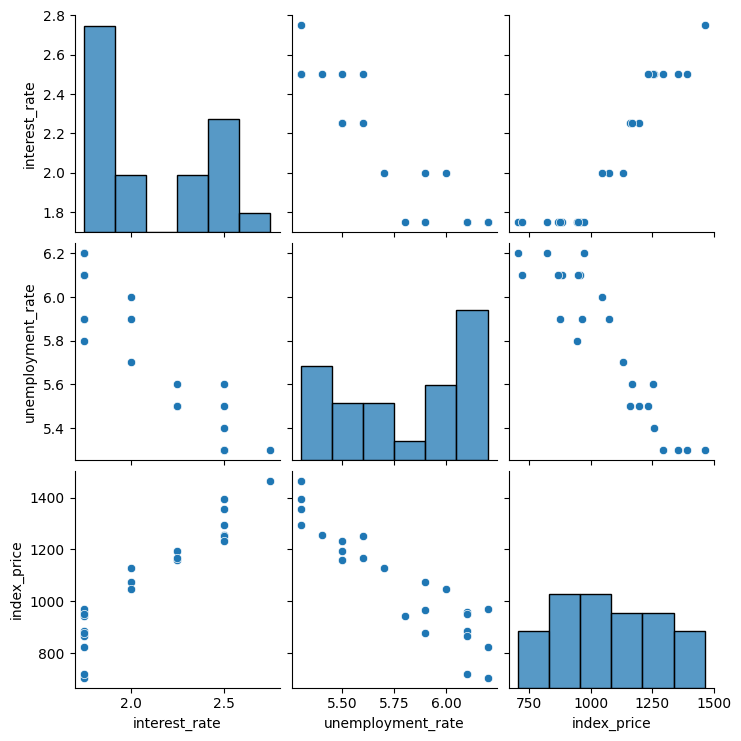

In [9]:
# visualize the data to take an idea about relation
import seaborn as sns
sns.pairplot(df_index)
# having some +relation and -relation also

In [10]:
# correlation
df_index.corr()


,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

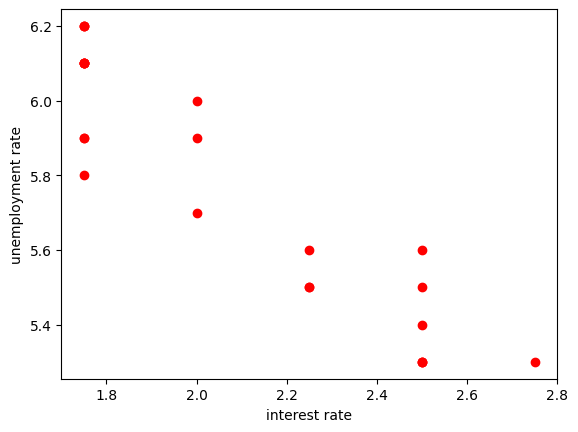

In [13]:
# lets visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'], color = 'red')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

### getting independent and dependent features

In [16]:
X=df_index[['interest_rate','unemployment_rate']]
# or we can do using log
# X = df_index.iloc[:,:-1]
y=df_index['index_price']
# y=df_index[:,-1]

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

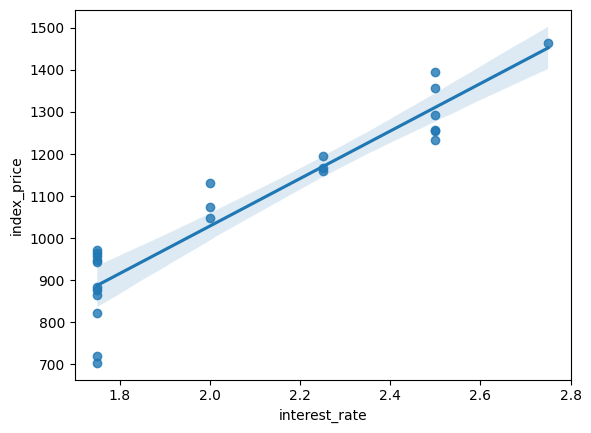

In [21]:
# seaborn regplot , it gives idea about the regression line with x,y features
# it is only for the two features
import seaborn as sns
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='unemployment_rate', ylabel='index_price'>

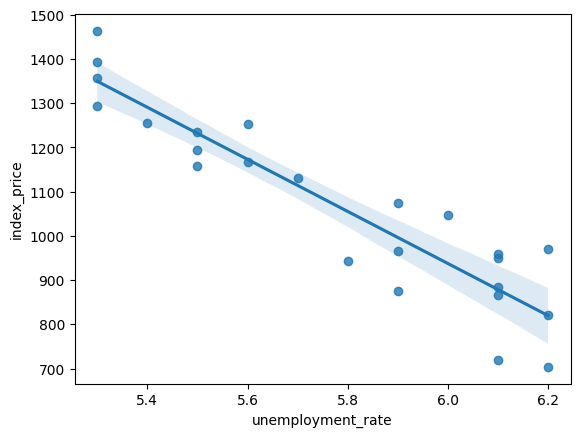

In [22]:
sns.regplot(x=df_index['unemployment_rate'], y=df_index['index_price'])

In [23]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
print(X_train , X_test)

[[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]] [[ 0.36115756 -0.82078268]
 [-1.08347268  1.33377186]
 [ 1.8057878  -1.43636969]
 [-1.08347268  1.02597835]
 [-0.36115756  0.41039134]
 [ 0.36115756 -0.51298918]]


In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
## cross validation
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)

In [29]:
print(cross_validation_score) # defferent mean score for three cv set

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [31]:
print(np.mean(cross_validation_score))

-5914.828180162388


In [33]:
## prediction
y_pred = regression.predict(X_test)
print(y_pred)

[1180.7466813   802.74279699 1379.83457045  838.52599602  973.85313963
 1144.96348227]


In [34]:
## performance matrix

from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

8108.567426306604 73.80444932337097 90.04758423359621


In [38]:
from sklearn.metrics import r2_score
r2_scoe = r2_score(y_test, y_pred)
print(r2_scoe)
1-(1-r2_scoe)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7591371539010257


0.5985619231683761

### Asumptions
- checking model is performing well or not

Text(0, 0.5, 'y_pred')

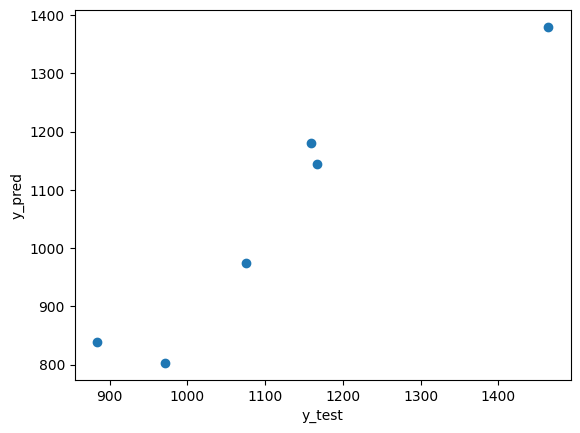

In [40]:
plt.scatter(y_test, y_pred) # linear relation
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [41]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


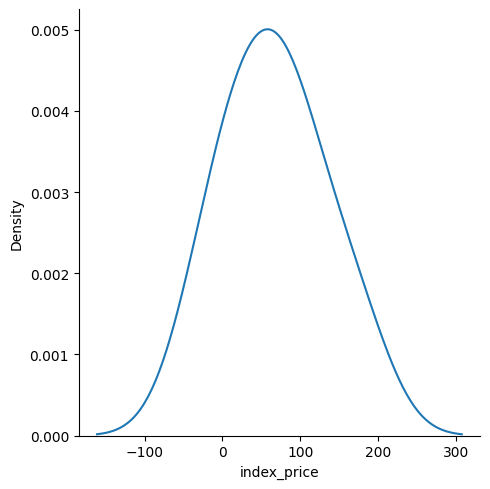

In [43]:
# plotting residuals 
sns.displot(residuals, kind = 'kde')
# if it is normally or uniformly distributed we can say good

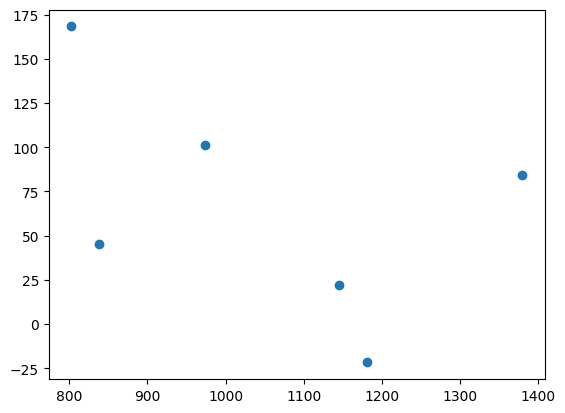

In [44]:
## scatter plot with respect to prediction and residuals 
plt.scatter(y_pred, residuals)
# it is also a uniform distribution

In [45]:
# OLS regression
import statsmodels.api as sm
model=  sm.OLS(y_train, X_train).fit()

In [47]:
print(model.summary(), regression.coef_)
# just check it here

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 15 May 2025   Prob (F-statistic):                       0.754
Time:                        10:48:30   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\asus\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
